In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PREPROCESSING

In [3]:
# haversine formula
def haversine(lat1, lon1, lat2, lon2):
	R = 6371000  # radius of Earth in meters
	phi1 = np.radians(lat1)
	phi2 = np.radians(lat2)
	delta_phi = np.radians(lat2 - lat1)
	delta_lambda = np.radians(lon2 - lon1)
	a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
	c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
	meters = R * c  # output distance in meters
	return meters

def get_distance(df):
	# calculate distance between all points
	distances = [0]
	for i in range(1, len(df)):
		distance = haversine(df['Lat'].iloc[i-1], df['Lon'].iloc[i-1], df['Lat'].iloc[i], df['Lon'].iloc[i])
		distances.append(distance)
	return distances

def get_duration(df):
	return df['Time'] - df['Time'].min()

def get_progress(df):
	return df['Duration'] / df['Duration'].max()

def preprocess(df):
	# convert time (from 1970) to datetime
	df['Timestamp'] = pd.to_datetime(df['Time'], unit='s')
	# convert time to duration
	df['Duration'] = get_duration(df)
	# convert duration to progress
	df['Progress'] = get_progress(df) * 100
	# convert lat/lon to distance
	df['Distance_diff'] = get_distance(df)
	# convert distance to comulative distance
	df['Distance'] = df['Distance_diff'].cumsum()

	return df

SITTING DATA

In [4]:
df_gps = pd.read_csv('data/sit/gps.csv')
# df_cell = pd.read_csv('data/sit/cell.csv')

df_gps.head()

,Time,Lat,Lon,Altitude,Accuracy,Heading,Speed,Battery
0,1739951497,42.355589,-71.098808,10.800000,20.000000,-1.0,-1.0,0.95
1,1739951520,42.355576,-71.098686,6.557553,12.846121,-1.0,-1.0,0.95
2,1739951520,42.354444,-71.097188,11.221894,1480.330199,-1.0,-1.0,0.95
3,1739951521,42.355595,-71.098850,6.996619,19.998177,-1.0,-1.0,0.95
4,1739951527,42.355593,-71.098847,6.993284,19.973937,-1.0,-1.0,0.95


In [5]:
df_gps = preprocess(df_gps)
# df_cell = preprocess(df_cell)

df_gps.head()

,Time,Lat,Lon,Altitude,Accuracy,Heading,Speed,Battery,Timestamp,Duration,Progress,Distance_diff,Distance
0,1739951497,42.355589,-71.098808,10.800000,20.000000,-1.0,-1.0,0.95,2025-02-19 07:51:37,0,0.000000,0.000000,0.000000
1,1739951520,42.355576,-71.098686,6.557553,12.846121,-1.0,-1.0,0.95,2025-02-19 07:52:00,23,0.119338,10.129002,10.129002
2,1739951520,42.354444,-71.097188,11.221894,1480.330199,-1.0,-1.0,0.95,2025-02-19 07:52:00,23,0.119338,176.000593,186.129595
3,1739951521,42.355595,-71.098850,6.996619,19.998177,-1.0,-1.0,0.95,2025-02-19 07:52:01,24,0.124527,187.149310,373.278905
4,1739951527,42.355593,-71.098847,6.993284,19.973937,-1.0,-1.0,0.95,2025-02-19 07:52:07,30,0.155658,0.318722,373.597627


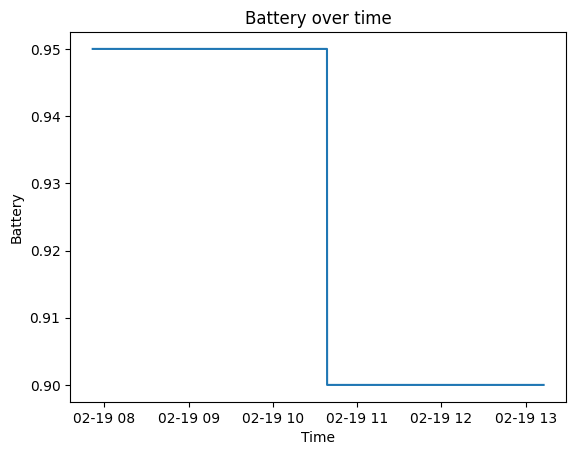

In [6]:
# plot battery over time

plt.plot(df_gps['Timestamp'], df_gps['Battery'])
plt.xlabel('Time')
plt.ylabel('Battery')
plt.savefig("battery_over_time_gps.png", dpi=300, bbox_inches="tight")
plt.title('Battery over time')
plt.show()

WALKING DATA

In [7]:
# read log.csv into df
df_cell = pd.read_csv('data/walk/cell.csv')
df_cell2 = pd.read_csv('data/walk/cell2.csv')
df_cell_wifion = pd.read_csv('data/walk/cell+wifion.csv')
df_wifi = pd.read_csv('data/walk/wifi.csv')
df_wifi2 = pd.read_csv('data/walk/wifi2.csv')
df_gps = pd.read_csv('data/walk/gps.csv')
df_cell.head()

,Time,Lat,Lon,Altitude,Accuracy,Heading,Speed,Battery
0,1.739983e+09,42.360128,-71.094577,7.811095,29.968997,-1.0,-1.0,0.95
1,1.739983e+09,42.360128,-71.094577,7.810927,40.451872,-1.0,-1.0,0.95
2,1.739983e+09,42.360922,-71.093344,7.811950,23.158655,-1.0,-1.0,0.95
3,1.739983e+09,42.360919,-71.093347,7.810927,71.371745,-1.0,-1.0,0.95
4,1.739983e+09,42.361267,-71.092643,20.629085,28.492728,-1.0,-1.0,0.95


In [8]:
df_cell = preprocess(df_cell)
df_cell2 = preprocess(df_cell2)
df_cell_wifion = preprocess(df_cell_wifion)
df_wifi = preprocess(df_wifi)
df_wifi2 = preprocess(df_wifi2)
df_gps = preprocess(df_gps)

df_cell.head()

,Time,Lat,Lon,Altitude,Accuracy,Heading,Speed,Battery,Timestamp,Duration,Progress,Distance_diff,Distance
0,1.739983e+09,42.360128,-71.094577,7.811095,29.968997,-1.0,-1.0,0.95,2025-02-19 16:32:47.780493021,0.000000,0.000000,0.000000,0.000000
1,1.739983e+09,42.360128,-71.094577,7.810927,40.451872,-1.0,-1.0,0.95,2025-02-19 16:32:47.799000025,0.018507,0.011155,0.000000,0.000000
2,1.739983e+09,42.360922,-71.093344,7.811950,23.158655,-1.0,-1.0,0.95,2025-02-19 16:33:55.400762081,67.620269,40.757856,134.381147,134.381147
3,1.739983e+09,42.360919,-71.093347,7.810927,71.371745,-1.0,-1.0,0.95,2025-02-19 16:34:46.042640924,118.262148,71.282053,0.414773,134.795919
4,1.739983e+09,42.361267,-71.092643,20.629085,28.492728,-1.0,-1.0,0.95,2025-02-19 16:34:48.196337938,120.415845,72.580185,69.592979,204.388899


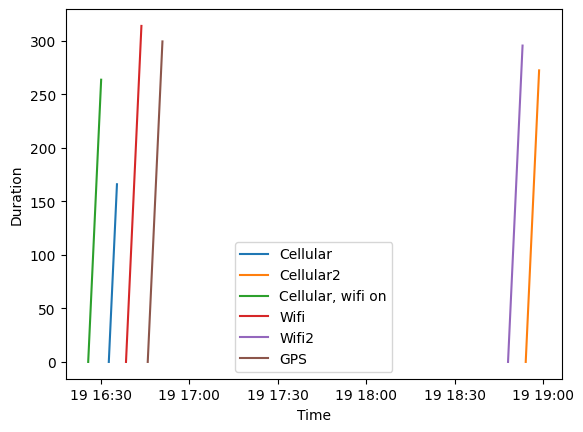

In [9]:
# plot durations
plt.plot(df_cell['Timestamp'], df_cell['Duration'], label='Cellular')
plt.plot(df_cell2['Timestamp'], df_cell2['Duration'], label='Cellular2')
plt.plot(df_cell_wifion['Timestamp'], df_cell_wifion['Duration'], label='Cellular, wifi on')
plt.plot(df_wifi['Timestamp'], df_wifi['Duration'], label='Wifi')
plt.plot(df_wifi2['Timestamp'], df_wifi2['Duration'], label='Wifi2')
plt.plot(df_gps['Timestamp'], df_gps['Duration'], label='GPS')
plt.xlabel('Time')
plt.ylabel('Duration')
plt.legend()

In [10]:
print("Resolution:")
print("Cellular, wifi is off: {} samples".format(len(df_cell)))
print("Cellular, wifi is off: {} samples".format(len(df_cell2)))
print("Cellular, wifi is on: {} samples".format(len(df_cell_wifion)))
print("Wifi, cell is off: {} samples".format(len(df_wifi)))
print("Wifi, cell is off: {} samples".format(len(df_wifi2)))
print("GPS: {} samples".format(len(df_gps)))

Resolution:
Cellular, wifi is off: 9 samples
Cellular, wifi is off: 15 samples
Cellular, wifi is on: 110 samples
Wifi, cell is off: 64 samples
Wifi, cell is off: 59 samples
GPS: 276 samples


In [11]:
# average resolutions for each sensor
print("Average resolution:")
print("Cellular: {} samples".format((len(df_cell) + len(df_cell2))/2))
print("Wifi: {} samples".format((len(df_wifi) + len(df_wifi2))/2))
print("GPS: {} samples".format(len(df_gps)))


Average resolution:
Cellular: 12.0 samples
Wifi: 61.5 samples
GPS: 276 samples


In [12]:
TRUTH = 492.5

print("Total distances:")
print("Cellular, wifi is off: {}, error: {}".format(df_cell['Distance_diff'].sum().round(2), abs(TRUTH - df_cell['Distance_diff'].sum()).round(2)))
print("Cellular, wifi is off: {}, error: {}".format(df_cell2['Distance_diff'].sum().round(2), abs(TRUTH - df_cell2['Distance_diff'].sum()).round(2)))
print("Cellular, wifi is on: {}, error: {}".format(df_cell_wifion['Distance_diff'].sum().round(2), abs(TRUTH - df_cell_wifion['Distance_diff'].sum()).round(2)))
print("Wifi, cell is off: {}, error: {}".format(df_wifi['Distance_diff'].sum().round(2), abs(TRUTH - df_wifi['Distance_diff'].sum()).round(2)))
print("Wifi, cell is off: {}, error: {}".format(df_wifi2['Distance_diff'].sum().round(2), abs(TRUTH - df_wifi2['Distance_diff'].sum()).round(2)))
print("GPS: {}, error: {}".format(df_gps['Distance_diff'].sum().round(2), abs(TRUTH - df_gps['Distance_diff'].sum()).round(2)))

Total distances:
Cellular, wifi is off: 266.54, error: 225.96
Cellular, wifi is off: 645.07, error: 152.57
Cellular, wifi is on: 671.73, error: 179.23
Wifi, cell is off: 964.39, error: 471.89
Wifi, cell is off: 553.21, error: 60.71
GPS: 559.54, error: 67.04


In [13]:
# avera ge distances and errors for each sensor
cell_dist1 = df_cell['Distance_diff'].sum()
cell_dist2 = df_cell2['Distance_diff'].sum()
cell_dist3 = df_cell_wifion['Distance_diff'].sum()
wifi_dist1 = df_wifi['Distance_diff'].sum()
wifi_dist2 = df_wifi2['Distance_diff'].sum()
gps_dist = df_gps['Distance_diff'].sum()
print("Average distances:")
print("Cellular: {}, error: {}".format((cell_dist1 + cell_dist2)/2, (abs(TRUTH - cell_dist1) + abs(TRUTH - cell_dist2))/2))
print("Wifi: {}, error: {}".format((wifi_dist1 + wifi_dist2)/2, (abs(TRUTH - wifi_dist1) + abs(TRUTH - wifi_dist2))/2))
print("GPS: {}, error: {}".format(gps_dist, abs(TRUTH - gps_dist).round(2)))

Average distances:
Cellular: 455.8022161339541, error: 189.2632563560565
Wifi: 758.8030469656437, error: 266.30304696564366
GPS: 559.5371607630935, error: 67.04


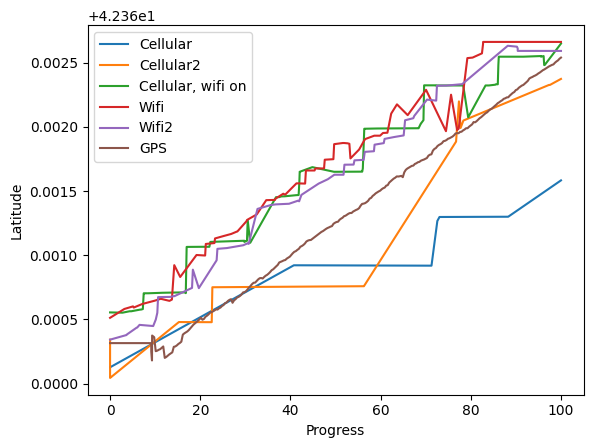

In [14]:
# print Lat over progress
plt.plot(df_cell['Progress'], df_cell['Lat'], label='Cellular')
plt.plot(df_cell2['Progress'], df_cell2['Lat'], label='Cellular2')
plt.plot(df_cell_wifion['Progress']*(-1)+100, df_cell_wifion['Lat'], label='Cellular, wifi on')
plt.plot(df_wifi['Progress']*(-1)+100, df_wifi['Lat'], label='Wifi')
plt.plot(df_wifi2['Progress']*(-1)+100, df_wifi2['Lat'], label='Wifi2')
plt.plot(df_gps['Progress'], df_gps['Lat'], label='GPS')
plt.xlabel('Progress')
plt.ylabel('Latitude')
plt.legend()
plt.show()

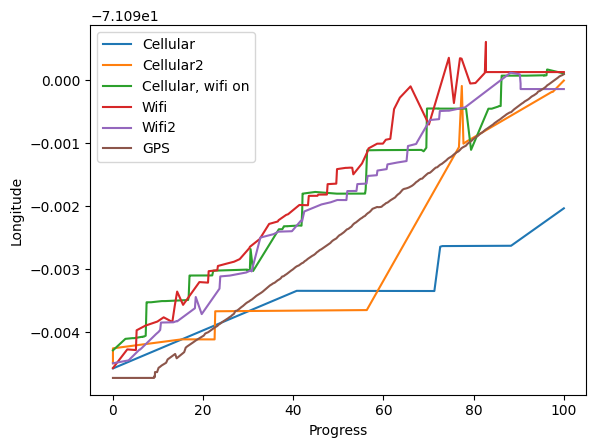

In [15]:
# print Lon over progress
plt.plot(df_cell['Progress'], df_cell['Lon'], label='Cellular')
plt.plot(df_cell2['Progress'], df_cell2['Lon'], label='Cellular2')
plt.plot(df_cell_wifion['Progress']*(-1)+100, df_cell_wifion['Lon'], label='Cellular, wifi on')
plt.plot(df_wifi['Progress']*(-1)+100, df_wifi['Lon'], label='Wifi')
plt.plot(df_wifi2['Progress']*(-1)+100, df_wifi2['Lon'], label='Wifi2')
plt.plot(df_gps['Progress'], df_gps['Lon'], label='GPS')
plt.xlabel('Progress')
plt.ylabel('Longitude')
plt.legend()
plt.show()

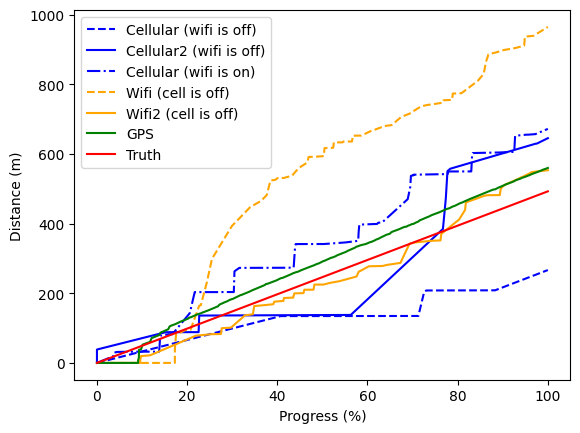

In [16]:

# \begin{table}[h!]
#     \centering
#     \begin{tabular}{|c|c|c|c|c|}
#         \hline
#         \textbf{Trial \#} & \textbf{Sensor} & \textbf{Average Distance, m} & \textbf{Error, m} & \textbf{NSamples} \\ \hline
#         1 & Cellular (wifi is off) & 266.54 & 225.96 & 9 \\ \hline
#         2 & Cellular (wifi is off) & 645.07 & 152.57 & 15 \\ \hline
#         3 & Cellular (wifi is on) & 671.73 & 179.23 & 110 \\ \hline
#         4 & Wifi (cell is off) & 964.39 & 471.89 & 64 \\ \hline
#         5 & Wifi (cell is off) & 553.21 & 60.71 & 59 \\ \hline
#         6 & GPS & 559.54 & 67.04 & 276 \\ \hline
#     \end{tabular}
#     \caption{Estimated Distances for each of 6 trials}
#     \label{tab:distances}
# \end{table}


# plot distance over progress
plt.plot(df_cell['Progress'], df_cell['Distance'], label='Cellular (wifi is off)', color='blue', linestyle='--')
plt.plot(df_cell2['Progress'], df_cell2['Distance'], label='Cellular2 (wifi is off)', color='blue')
plt.plot(df_cell_wifion['Progress'], df_cell_wifion['Distance'], label='Cellular (wifi is on)', color='blue', linestyle='-.')
plt.plot(df_wifi['Progress'], df_wifi['Distance'], label='Wifi (cell is off)', color='orange', linestyle='--')
plt.plot(df_wifi2['Progress'], df_wifi2['Distance'], label='Wifi2 (cell is off)', color='orange')
plt.plot(df_gps['Progress'], df_gps['Distance'], label='GPS', color='green')
plt.plot([0, 100], [0, TRUTH], label='Truth', color='red')
plt.xlabel('Progress (%)')
plt.ylabel('Distance (m)')
plt.legend()
plt.show()

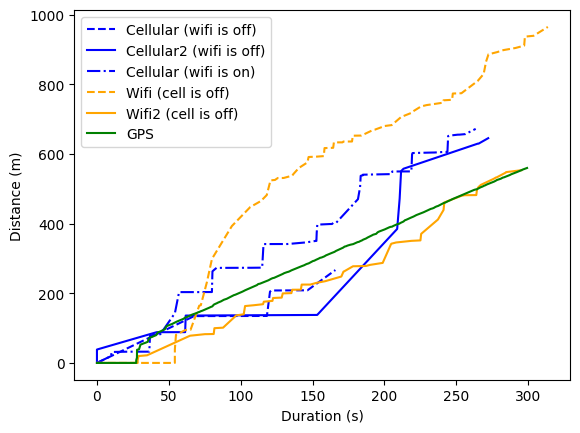

In [20]:
# plot distances over duration

plt.plot(df_cell['Duration'], df_cell['Distance'], label='Cellular (wifi is off)', color='blue', linestyle='--')
plt.plot(df_cell2['Duration'], df_cell2['Distance'], label='Cellular2 (wifi is off)', color='blue')
plt.plot(df_cell_wifion['Duration'], df_cell_wifion['Distance'], label='Cellular (wifi is on)', color='blue', linestyle='-.')
plt.plot(df_wifi['Duration'], df_wifi['Distance'], label='Wifi (cell is off)', color='orange', linestyle='--')
plt.plot(df_wifi2['Duration'], df_wifi2['Distance'], label='Wifi2 (cell is off)', color='orange')
plt.plot(df_gps['Duration'], df_gps['Distance'], label='GPS', color='green')
# plt.plot([0, df_cell['Duration'].max()], [0, TRUTH], label='Truth', color='red')
plt.xlabel('Duration (s)')
plt.ylabel('Distance (m)')
plt.legend()